In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
df.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [5]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [6]:
df['date'] = df['time_stamp'].dt.floor('d').astype(np.int64)
df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,1398124800000000000
1,2013-11-15 03:45:04,2,1,1384473600000000000
2,2013-11-29 03:45:04,2,1,1385683200000000000
3,2013-12-09 03:45:04,2,1,1386547200000000000
4,2013-12-25 03:45:04,2,1,1387929600000000000


In [7]:
df_sorted = df.sort_values(by=['user_id', 'date']).drop_duplicates(keep='first')
df_sorted.head(10)

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,1398124800000000000
1,2013-11-15 03:45:04,2,1,1384473600000000000
2,2013-11-29 03:45:04,2,1,1385683200000000000
3,2013-12-09 03:45:04,2,1,1386547200000000000
4,2013-12-25 03:45:04,2,1,1387929600000000000
5,2013-12-31 03:45:04,2,1,1388448000000000000
6,2014-01-08 03:45:04,2,1,1389139200000000000
7,2014-02-03 03:45:04,2,1,1391385600000000000
8,2014-02-08 03:45:04,2,1,1391817600000000000
9,2014-02-09 03:45:04,2,1,1391904000000000000


In [8]:
grouped_df = df_sorted.groupby('user_id')['date'].rolling(window=3)
delta_time = pd.to_timedelta((grouped_df.max()- grouped_df.min())).dt.days
delta_time.head(20)

user_id    
1        0      NaN
2        1      NaN
         2      NaN
         3     24.0
         4     26.0
         5     22.0
         6     14.0
         7     34.0
         8     31.0
         9      6.0
         10     5.0
         11     7.0
         12    24.0
         13    25.0
         14    22.0
3        15     NaN
4        16     NaN
5        17     NaN
6        18     NaN
7        19     NaN
Name: date, dtype: float64

In [9]:
delta_time[delta_time == 7]

user_id        
2        11        7.0
10       24        7.0
         32        7.0
         44        7.0
         45        7.0
                  ... 
11975    207676    7.0
         207693    7.0
         207705    7.0
         207748    7.0
11988    207879    7.0
Name: date, Length: 6677, dtype: float64

In [10]:
adopted_user = delta_time[delta_time == 7.0].index.get_level_values(0).unique().tolist()
adopted_user

[2,
 10,
 33,
 42,
 50,
 60,
 63,
 69,
 74,
 81,
 82,
 87,
 133,
 135,
 146,
 153,
 160,
 165,
 168,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 297,
 298,
 305,
 310,
 311,
 322,
 341,
 345,
 351,
 362,
 363,
 370,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 478,
 483,
 492,
 494,
 497,
 502,
 509,
 510,
 512,
 518,
 520,
 522,
 529,
 535,
 540,
 553,
 564,
 572,
 601,
 603,
 605,
 618,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 717,
 724,
 728,
 754,
 772,
 783,
 786,
 804,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 980,
 985,
 1009,
 1013,
 1017,
 1018,
 1027,
 1039,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1212,
 1235,
 1245,
 1250,
 1274,
 1280,
 1290,
 1318,
 1319,
 1320,
 1327,
 1339,
 1343,
 1345,
 1350,
 1357,
 1368,
 1396,
 1407,
 1410,
 1411,
 1421,
 1

In [11]:
# load other dataset

In [12]:
users_df = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [14]:
users_df['is_adopted'] = np.where(users_df['object_id'].isin(adopted_user), 1, 0)
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [15]:
users_df['is_adopted'].value_counts(normalize=True).round(2)

0    0.89
1    0.11
Name: is_adopted, dtype: float64

<AxesSubplot:xlabel='is_adopted', ylabel='count'>

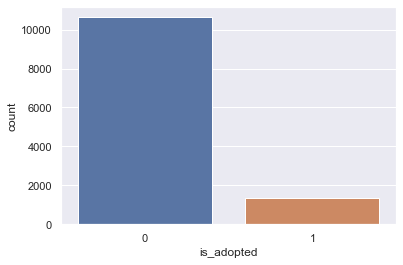

In [16]:
sns.countplot(data=users_df, x='is_adopted')

In [17]:
invites_to_other_count = users_df.groupby('invited_by_user_id')['object_id'].count().reset_index()
invites_to_other_count = invites_to_other_count.rename(columns={'invited_by_user_id':'id', 'object_id':'invites_sent'})
invites_to_other_count

,id,invites_sent
0,3.0,1
1,7.0,5
2,10.0,1
3,21.0,1
4,23.0,3
...,...,...
2559,11981.0,1
2560,11986.0,1
2561,11994.0,7
2562,11997.0,1


In [18]:
users_df = pd.merge(users_df, invites_to_other_count, 
                    left_on='object_id', right_on='id', how='left')
users_df['invites_sent'] = users_df['invites_sent'].fillna(0)

users_df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,id,invites_sent
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,NaN,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,NaN,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,3.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,NaN,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,NaN,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0,NaN,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0,7.0,5.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0,NaN,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0,NaN,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,10.0,1.0


In [19]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  is_adopted                  12000 non-null  int32  
 11  id                          2564 non-null   float64
 12  invites_sent                12000 non-null  float64
dtypes: float64(4), int32(1), int64(

In [20]:
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].fillna(0)
users_df.loc[users_df['invited_by_user_id'] != 0, 'invited_by_user_id'] = 1 
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].astype(int)
users_df['invited_by_user_id'].sum()

6417

In [21]:
#users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(0)
#users_df['has_last_session'] =np.where(users_df['last_session_creation_time'] != 0, 1, 0) 

#users_df['has_last_session'] = users_df['has_last_session'].astype(int)

In [22]:
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['creation_time_month'] = users_df['creation_time'].dt.month.astype('object')
users_df['creation_time_year'] = users_df['creation_time'].dt.year.astype('object')
users_df['creation_time_dayofweer'] = users_df['creation_time'].dt.dayofweek.astype('object')
users_df['creation_time_is_weekend'] = np.where(
    ((users_df['creation_time_dayofweer']==5) | (users_df['creation_time_dayofweer']==6)),
    1, 0)

In [23]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,id,invites_sent,creation_time_month,creation_time_year,creation_time_dayofweer,creation_time_is_weekend
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,NaN,0.0,4,2014,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,NaN,0.0,11,2013,4,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,3.0,1.0,3,2013,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,NaN,0.0,5,2013,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,NaN,0.0,1,2013,3,0


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int32         
 10  is_adopted                  12000 non-null  int32         
 11  id                          2564 non-null   float64   

In [25]:
# Add email domain
users_df['domain'] = users_df['email'].apply(lambda x: x.split('@')[1])
users_df['domain'].value_counts(normalize=True).head(10)

gmail.com         0.296833
yahoo.com         0.203917
jourrapide.com    0.104917
cuvox.de          0.100167
gustr.com         0.098250
hotmail.com       0.097083
luque.com         0.000167
xybhi.com         0.000167
mumdc.com         0.000167
xvnbr.com         0.000167
Name: domain, dtype: float64

In [26]:
domains = ['gmail.com', 'yahoo.com', 'jourrapide.com', 
           'cuvox.de', 'gustr.com', 'hotmail.com']

In [27]:
users_df['domain'] = users_df['domain'].apply(lambda x: x if x in domains else 'other')

In [28]:
#visit_count = df.groupby(['user_id'])['visited'].sum().to_frame().reset_index()
#visit_count

In [29]:
#visit_count['visited'].hist(bins=50) 

In [30]:
#visit_count['user_id'].nunique(), users_df['object_id'].nunique()

In [31]:
#users_df = pd.merge(users_df, 
#                    visit_count, 
#                    left_on='object_id', 
#                    right_on='user_id',
#                    how='left')
#users_df['visited'] = users_df['visited'].fillna(0).astype(int)
#users_df.head()

In [32]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int32         
 10  is_adopted                  12000 non-null  int32         
 11  id                          2564 non-null   float64   

In [33]:
users_df.drop(['object_id',
               'creation_time',
               'name',
               'email',
               'last_session_creation_time',
               'org_id',
               'id'], axis=1, inplace=True)

In [34]:
oredered_cols = [col for col in users_df.columns.tolist() if col != 'is_adopted'] + ['is_adopted']
oredered_cols

['creation_source',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'invited_by_user_id',
 'invites_sent',
 'creation_time_month',
 'creation_time_year',
 'creation_time_dayofweer',
 'creation_time_is_weekend',
 'domain',
 'is_adopted']

In [35]:
users_df = users_df[oredered_cols]
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   invited_by_user_id          12000 non-null  int32  
 4   invites_sent                12000 non-null  float64
 5   creation_time_month         12000 non-null  object 
 6   creation_time_year          12000 non-null  object 
 7   creation_time_dayofweer     12000 non-null  object 
 8   creation_time_is_weekend    12000 non-null  int32  
 9   domain                      12000 non-null  object 
 10  is_adopted                  12000 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(5)
memory usage: 984.4+ KB


In [36]:
users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.0,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.0,1.0
invited_by_user_id,12000.0,0.534750,0.498812,0.0,0.0,1.0,1.0,1.0
invites_sent,12000.0,0.534750,1.350473,0.0,0.0,0.0,0.0,13.0
creation_time_is_weekend,12000.0,0.276500,0.447286,0.0,0.0,0.0,1.0,1.0
is_adopted,12000.0,0.113167,0.316810,0.0,0.0,0.0,0.0,1.0


In [37]:
for col in users_df.columns:
    print(f'{col}:\n{users_df[col].value_counts(normalize=True)}\n\n')

creation_source:
ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64


opted_in_to_mailing_list:
0    0.7505
1    0.2495
Name: opted_in_to_mailing_list, dtype: float64


enabled_for_marketing_drip:
0    0.850667
1    0.149333
Name: enabled_for_marketing_drip, dtype: float64


invited_by_user_id:
1    0.53475
0    0.46525
Name: invited_by_user_id, dtype: float64


invites_sent:
0.0     0.786333
1.0     0.091417
2.0     0.043917
3.0     0.028917
4.0     0.017083
5.0     0.013750
6.0     0.008167
7.0     0.005000
8.0     0.003000
9.0     0.001167
10.0    0.000833
11.0    0.000250
13.0    0.000083
12.0    0.000083
Name: invites_sent, dtype: float64


creation_time_month:
5     0.121250
3     0.098083
4     0.097417
1     0.085750
11    0.078000
2     0.077833
12    0.077500
10    0.077000
9     0.075083
8     0.071000
7     0.071000
6     0.070083
Nam

In [38]:
cat_col = [col for col in users_df.columns if users_df[col].dtype == 'object']
cat_col

['creation_source',
 'creation_time_month',
 'creation_time_year',
 'creation_time_dayofweer',
 'domain']

In [39]:
num_col = [col for col in users_df.columns if col not in cat_col]
num_col

['opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'invited_by_user_id',
 'invites_sent',
 'creation_time_is_weekend',
 'is_adopted']

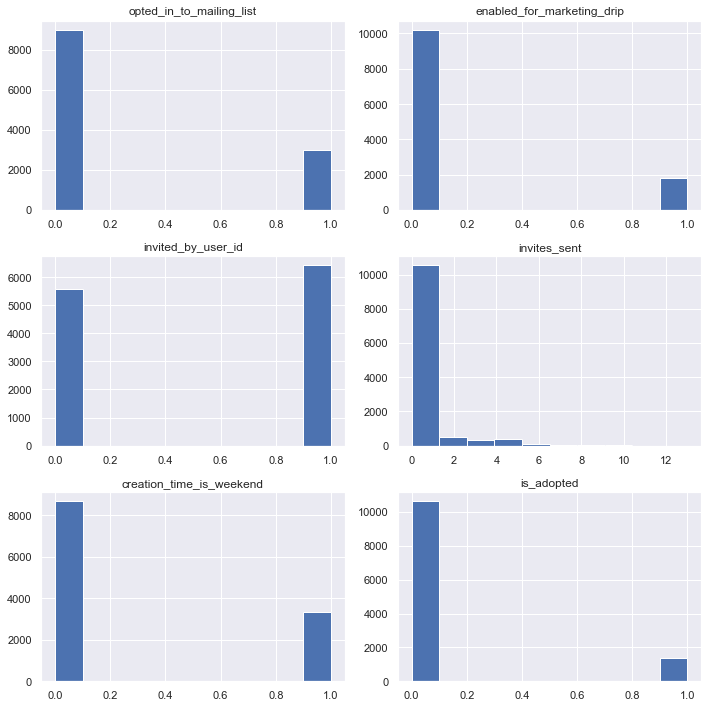

In [40]:
users_df.hist(figsize=(10,10))
plt.tight_layout()

In [41]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
palette = sns.diverging_palette(220, 20)

<AxesSubplot:>

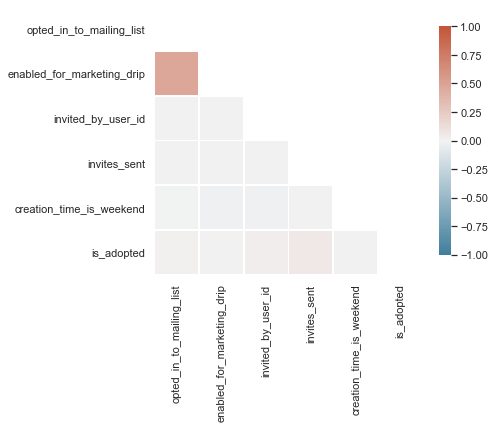

In [42]:
# Pearson
sns.set_style('whitegrid')
corr_matrix = users_df[num_col].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

In [43]:
#users_df['visited'].min()
#users_df['visited'].max()

In [44]:
#sns.kdeplot(data=users_df,
#           x='visited',
#           hue='is_adopted', 
#           common_norm=False,
#           fill=True).set(xlim=(0,200))
#plt.tight_layout()

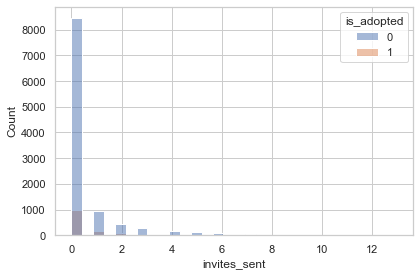

In [45]:
sns.histplot(data=users_df,
             x='invites_sent',
             hue='is_adopted',
            bins=30)
plt.tight_layout()

In [46]:
#sns.countplot(data=users_df,
#              x='has_last_session',
#              hue='is_adopted')
#plt.tight_layout()

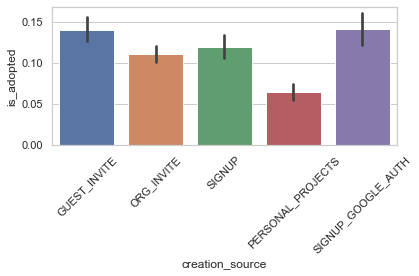

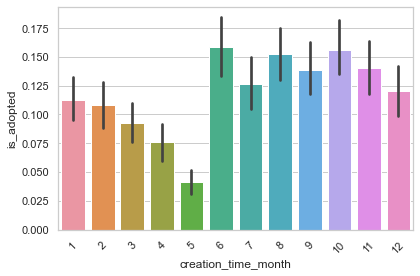

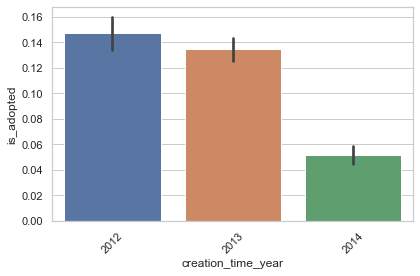

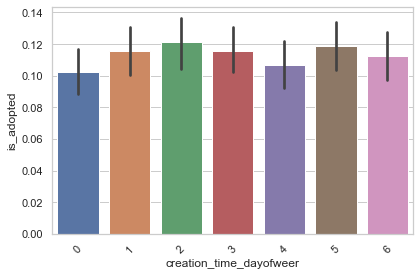

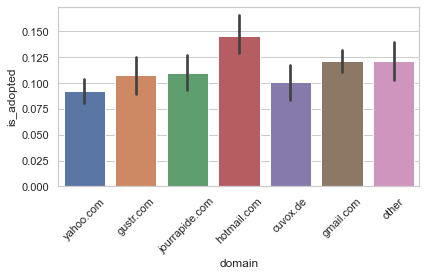

In [47]:
for col in cat_col:
    plt.figure()
    sns.barplot(data=users_df,
               x=col,
               y='is_adopted')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [48]:
# Get dummies for categorical columns
users_df = pd.get_dummies(users_df, columns=cat_col)
users_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,invites_sent,creation_time_is_weekend,is_adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,creation_time_dayofweer_4,creation_time_dayofweer_5,creation_time_dayofweer_6,domain_cuvox.de,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com
0,1,0,1,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0.0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
users_df.dtypes

opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
invited_by_user_id                      int32
invites_sent                          float64
creation_time_is_weekend                int32
is_adopted                              int32
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
creation_time_month_1                   uint8
creation_time_month_2                   uint8
creation_time_month_3                   uint8
creation_time_month_4                   uint8
creation_time_month_5                   uint8
creation_time_month_6                   uint8
creation_time_month_7                   uint8
creation_time_month_8                   uint8
creation_time_month_9                   uint8
creation_time_month_10                  uint8
creation_time_month_11            

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [51]:
X = users_df.drop(['is_adopted'], axis=1)
y = users_df.is_adopted

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state=42, 
                                                    stratify=y)

In [52]:
# Pipeline to scale and fit
steps = [('scaler', MinMaxScaler()), 
         ('clf', LogisticRegression(solver='liblinear', 
                                    penalty='l1',
                                    class_weight='balanced',
                                    max_iter=1000))]

pipeline = Pipeline(steps=steps)

# Grid search
parameters ={'clf__C': [0.1, 1, 10, 20, 50]}

search_lr = GridSearchCV(estimator=pipeline, 
                         param_grid=parameters,
                         cv=5,
                         scoring='f1',
                         return_train_score=True,
                         verbose=3)

# Preprocessing of training data, fit model 
search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....clf__C=0.1;, score=(train=0.253, test=0.270) total time=   0.0s
[CV 2/5] END ....clf__C=0.1;, score=(train=0.254, test=0.244) total time=   0.0s
[CV 3/5] END ....clf__C=0.1;, score=(train=0.260, test=0.240) total time=   0.0s
[CV 4/5] END ....clf__C=0.1;, score=(train=0.257, test=0.253) total time=   0.0s
[CV 5/5] END ....clf__C=0.1;, score=(train=0.257, test=0.258) total time=   0.0s
[CV 1/5] END ......clf__C=1;, score=(train=0.255, test=0.276) total time=   0.0s
[CV 2/5] END ......clf__C=1;, score=(train=0.255, test=0.245) total time=   0.0s
[CV 3/5] END ......clf__C=1;, score=(train=0.264, test=0.235) total time=   0.0s
[CV 4/5] END ......clf__C=1;, score=(train=0.256, test=0.255) total time=   0.0s
[CV 5/5] END ......clf__C=1;, score=(train=0.258, test=0.259) total time=   0.0s
[CV 1/5] END .....clf__C=10;, score=(train=0.255, test=0.276) total time=   0.1s
[CV 2/5] END .....clf__C=10;, score=(train=0.254,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           penalty='l1',
                                                           solver='liblinear'))]),
             param_grid={'clf__C': [0.1, 1, 10, 20, 50]},
             return_train_score=True, scoring='f1', verbose=3)

In [53]:
opt_lr_clf = search_lr.best_estimator_
search_lr.best_params_

{'clf__C': 1}

In [54]:
# Predictions
y_pred_train_lr = opt_lr_clf.predict(X_train)
y_pred_test_lr = opt_lr_clf.predict(X_test)
y_pred_proba_train_lr = opt_lr_clf.predict_proba(X_train)
y_pred_proba_test_lr = opt_lr_clf.predict_proba(X_test)

In [55]:
# classification report
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64      2661
           1       0.15      0.73      0.25       339

    accuracy                           0.51      3000
   macro avg       0.54      0.61      0.45      3000
weighted avg       0.85      0.51      0.60      3000



In [56]:
opt_lr_clf.named_steps['clf'].coef_[0]

array([ 1.32493313e-01,  3.06537308e-02,  0.00000000e+00,  7.95012215e-01,
        0.00000000e+00,  1.56746418e-01, -5.55190971e-02, -6.95271170e-01,
        3.17956411e-02,  2.87918948e-01,  2.61951492e-01,  2.64713528e-02,
        1.05098080e-01, -1.83020432e-01, -9.48469248e-01,  1.01706347e-02,
       -1.35762981e-01,  2.97771135e-03,  0.00000000e+00,  4.52438767e-02,
       -6.94861385e-02, -9.54586196e-02,  1.38891543e-01,  1.79668046e-01,
       -8.09316378e-01, -1.70813849e-01,  1.98187916e-02,  1.08105854e-01,
        4.25041281e-04, -1.37414870e-01,  7.92486022e-02, -4.92993781e-02,
       -9.48063783e-02,  5.23388185e-04, -4.60165482e-02,  2.92993690e-01,
        2.42175127e-02,  1.67477048e-01, -1.00340341e-01])

In [57]:
len(X_train.columns.tolist())

39

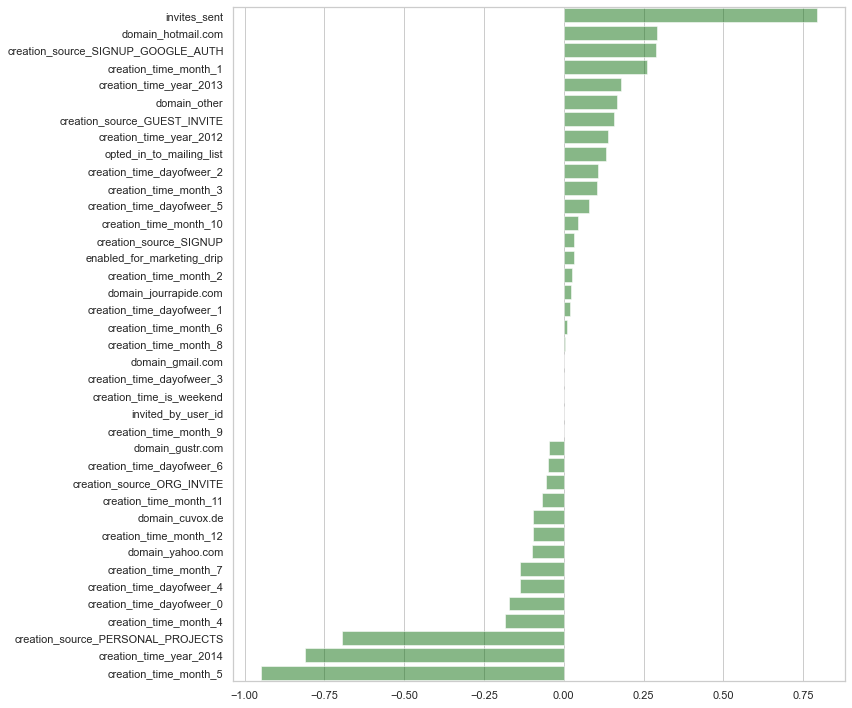

In [59]:
coef = pd.Series(data=opt_lr_clf.named_steps['clf'].coef_[0],
                 index = X_train.columns.tolist())
coef = coef.sort_values(ascending=False)


# Plot
plt.figure(figsize=(12, 10))
sns.barplot(y=coef.index, 
            x=coef.values,
            color='green',
            alpha=.5,
            orient='h')
plt.tight_layout()